# Polynomial ODE to transcriptional network examples

In [1]:
import matplotlib
matplotlib.rcParams.update({'font.size': 16})

## Sine-cosine oscillator

*Note:* The typical sine-cosine oscillator is $x' = y$ and $y' = -x$, which takes on negative values. Since transcriptional factor concentrations are nonnegative, we "shift" the oscillator up using $x' = y-2$ and $y' = -x+2$ so that both variables stay positive.

x_t' = 

x_b*y_t/y_b - 2*x_t + x_t/x_b

x_b' = 

2*x_b**2/x_t - 2*x_b + 1

y_t' = 

2*y_b - 2*y_t + y_t/y_b

y_b' = 

-2*y_b + 1 + x_t*y_b**2/(x_b*y_t)

tn_inits={x_t: 2.0, x_b: 1.0, y_t: 1.0, y_b: 1.0}
tn_ratios={x: x_t/x_b, y: y_t/y_b}


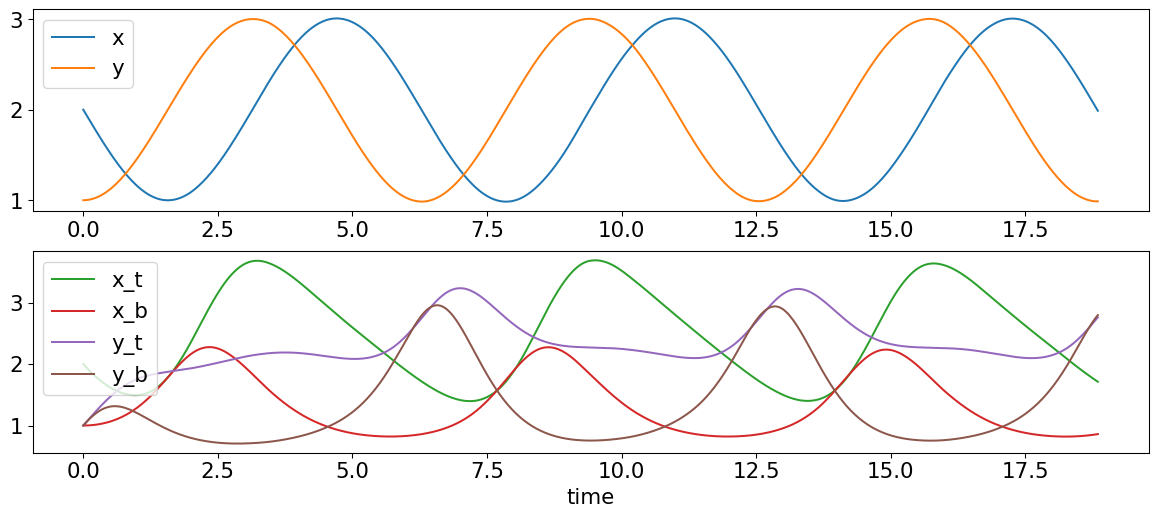

In [2]:
from math import pi
import numpy as np
import sympy as sp
from ode2tn import plot_tn, ode2tn

xt,xb,yt,yb = sp.symbols('x_t x_b y_t y_b')
x,y = sp.symbols('x y')
odes = {
    x: y-2,
    y: -x+2,
}
inits = {
    x: 2,
    y: 1,
}
gamma = 2
beta = 1
t_eval = np.linspace(0, 6*pi, 1000)
tn_odes, tn_inits, tn_ratios = ode2tn(odes, inits, gamma=gamma, beta=beta)
from IPython.display import display
for sym, expr in tn_odes.items():
    print(f"{sym}' = ", end='')
    display(expr)
print(f'{tn_inits=}')
print(f'{tn_ratios=}')
figsize = (15, 6)
plot_tn(odes, inits, gamma=gamma, beta=beta, t_eval=t_eval, figure_size=figsize, symbols_to_plot=[[x,y], [xt,xb,yt,yb]])

x_t' = x_b*y_t/y_b - 2*x_t + x_t/x_b
x_b' = 2*x_b**2/x_t - 2*x_b + 1
y_t' = 2*y_b - 2*y_t + y_t/y_b
y_b' = -2*y_b + 1 + x_t*y_b**2/(x_b*y_t)
tn_inits={x_t: 2.0, x_b: 1.0, y_t: 1.0, y_b: 1.0}
tn_ratios={x: x_t/x_b, y: y_t/y_b}
times = [0.         1.57079633 3.14159265 4.71238898 6.28318531]
x_y = [2.         1.78280757 3.67207594 2.80592514 1.71859172]
x_b = [1.         1.78425369 1.83663725 0.93260227 0.859926  ]
y_t = [1.         1.87324904 2.14156469 2.10338162 2.74383426]
y_b = [1.         0.93637933 0.71348949 1.05261915 2.78279691]


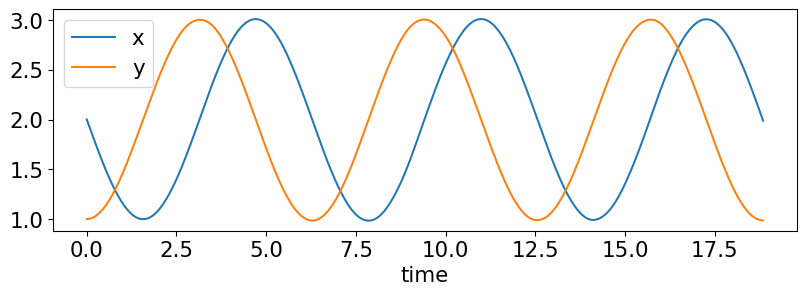

In [3]:
# simplified cell for example in README
from math import pi
import numpy as np
import sympy as sp
import gpac as gp
from ode2tn import plot_tn, ode2tn

x,y = sp.symbols('x y')
odes = { # odes dict maps each symbol to an expression for its time derivative
    x: y-2,
    y: -x+2,
}
inits = { # inits maps each symbol to its initial value
    x: 2,
    y: 1,
}
gamma = 2 # uniform decay constant; should be set sufficiently large that ???
beta = 1 # constant introduced to keep values from going to infinity or 0
t_eval = np.linspace(0, 6*pi, 1000)
tn_odes, tn_inits, tn_ratios = ode2tn(odes, inits, gamma=gamma, beta=beta)
for sym, expr in tn_odes.items():
    print(f"{sym}' = {expr}")
print(f'{tn_inits=}')
print(f'{tn_ratios=}')

plot_tn(odes, inits, gamma=gamma, beta=beta, t_eval=t_eval)

t_eval = np.linspace(0, 2*pi, 5)
sol = gp.integrate_odes(tn_odes, tn_inits, t_eval)
print(f'times = {sol.t}')
print(f'x_y = {sol.y[0]}')
print(f'x_b = {sol.y[1]}')
print(f'y_t = {sol.y[2]}')
print(f'y_b = {sol.y[3]}')

## ODEs that decay to 0

x_t' = 

-2*x_t + x_t/x_b

x_b' = 

1 - x_b

tn_inits={x_t: 1.0, x_b: 1.0}
tn_ratios={x: x_t/x_b}


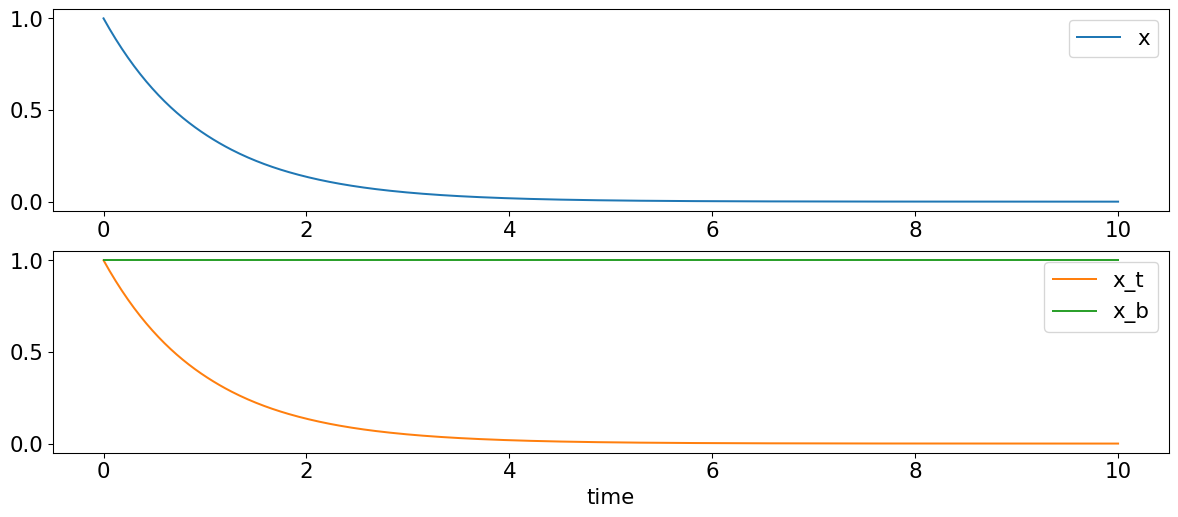

In [4]:
from math import pi
import numpy as np
import sympy as sp
import gpac as gp
from ode2tn import plot_tn, ode2tn

xt,xb = sp.symbols('x_t x_b')
x = sp.symbols('x')
odes = {
    x: -x,
}
inits = {
    x: 1,
}
gamma = 2
beta = 1
t_eval = np.linspace(0, 10, 500)
tn_odes, tn_inits, tn_ratios = ode2tn(odes, inits, gamma=gamma, beta=beta)
from IPython.display import display
for sym, expr in tn_odes.items():
    print(f"{sym}' = ", end='')
    display(expr)
print(f'{tn_inits=}')
print(f'{tn_ratios=}')
figsize = (15, 6)
plot_tn(odes, inits, gamma=gamma, beta=beta, t_eval=t_eval, figure_size=figsize, symbols_to_plot=[[x], [xt,xb]])
# import matplotlib.pyplot as plt
# plt.yscale('log')

## Bubble sort
These are ODEs that do a version of "bubble sort" in a sense. The variables $x_1,\dots,x_n$ are sorted. The variable $y_{i,i+1}$ is responsible for swapping $x_i$ and $x_{i+1}$ if they are out of order. See S. Paul and K. Huper, *Analog rank filtering*, in __IEEE Transactions on Circuits and Systems I: Fundamental Theory and Applications__, vol. 40, no. 7, pp. 469-476, July 1993, https://doi.org/10.1109/81.257302

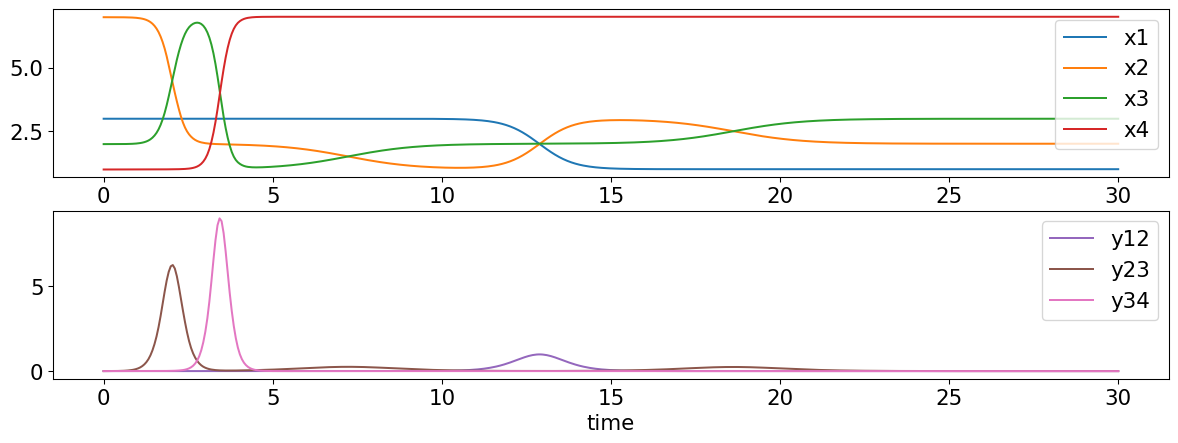

In [9]:
# bubble sort values x1, x2, x3, x4
x1,x2,x3,x4,y12,y23,y34 = sp.symbols('x1 x2 x3 x4 y12 y23 y34')

odes = {
    x1: -y12,
    x2: -y23+y12,
    x3: -y34+y23,
    x4: y34,
    y12: (x1-x2)*y12,
    y23: (x2-x3)*y23,
    y34: (x3-x4)*y34,
}
eps = 0.001
inits = {
    x1: 3,
    x2: 7,
    x3: 2,
    x4: 1,
    y12: eps,
    y23: eps,
    y34: eps,
}
t_eval = np.linspace(0,30,500)
gamma = 1
beta = 1
figsize = (15,5)
plot_tn(odes, inits, t_eval, gamma=gamma, beta=beta, figure_size=figsize, symbols_to_plot = [[x1,x2,x3,x4], [y12,y23,y34]])
import matplotlib.pyplot as plt
plt.savefig("bubble-sort.pdf", format="pdf", bbox_inches="tight")

## Schlögl system

This is a chemical reaction network with a "memory" (a.k.a., hysteresis). There are two species $X$ and $Y$. $X$ is only a catalyst so its concentration does not change. If we influence $X$

x_t' = 

-20*x_t + x_t/x_b

x_b' = 

1 - 20*x_b

y_t' = 

-20*y_t + 16.5*y_t**2/y_b + y_t/y_b + x_t*y_b/x_b

y_b' = 

-13.5*y_b + 1.0 + 11.0*y_t**2/y_b

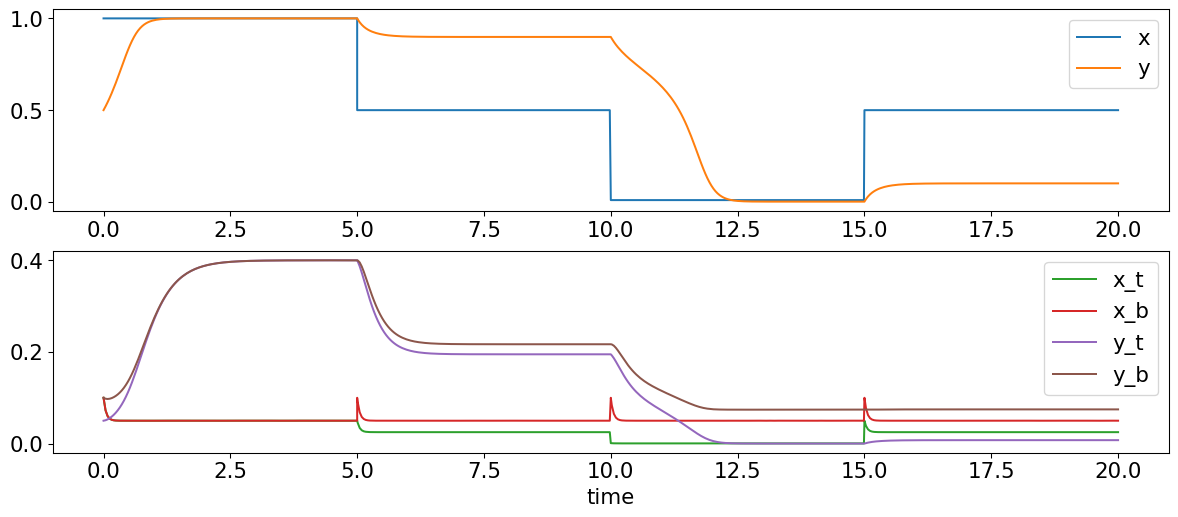

In [6]:
import gpac as gp
import numpy as np
import sympy as sp
from ode2tn import plot_tn, ode2tn

x_sp, y_sp = gp.species('x y')
rxns = [
    x_sp >> x_sp+y_sp,
    (3*y_sp | 2*y_sp).k(11).r(16.5),
    (y_sp >> gp.empty).k(6.5),
]
odes = gp.crn_to_odes(rxns)
# extract symbols from odes
for var in odes.keys():
    if var.name == 'x':
        x = var
    if var.name == 'y':
        y = var
# for v,ode in odes.items():
#     print(f"{v}' = {ode}")
inits = {
    x: 1,
    y: 0.5,
}
gamma = 20
beta = 1
scale = 0.1
t_eval = np.linspace(0, 20, 500)

tn_odes, tn_inits, tn_ratios = ode2tn(odes, inits, gamma=gamma, beta=beta, scale=scale)
for ratio_symbol in tn_inits.keys():
    if ratio_symbol.name == 'x_t':
        xt = ratio_symbol
    if ratio_symbol.name == 'x_b':
        xb = ratio_symbol
    if ratio_symbol.name == 'y_t':
        yt = ratio_symbol
    if ratio_symbol.name == 'y_b':
        yb = ratio_symbol
from IPython.display import display
for sym, expr in tn_odes.items():
    print(f"{sym}' = ", end='')
    display(sp.simplify(expr))
# print(f'{tn_inits=}')
# print(f'{tn_ratios=}')
# for var, val in tn_inits.items():
#     tn_inits[var] *= 0.1
# print(f'after reducing t/b values by 10x: {tn_inits=}')
figsize = (15, 6)

# The `resets` parameter allows one to step in at pre-defined times and alter the value of variables.
# Below, we set x to 0.5 at time 5, to 0.01 at time 10, and to 0.5 at time 15.
# Variables can be original (x) or new (x_t, x_b). If new, the value is simply set.
# If an original variable set to value `val`, it is set the same way initial values are calculated:
# `x_t` is set to `scale*val`, and `x_b` is set to `scale`.
# This is used to show the "memory": 
# x starts "large" (1).
# The first time we set x to 0.5, y stays large (around 0.9).
# We then set x very low, which changes y to about 0.
# When we set x back to 0.5, and the system remembers that we previously made x low, 
# keeping y low (around 0.1), unlike the first time we set x to 0.5.
resets = { 
    5:  {x: 0.5},
    10: {x: 0.01},
    15: {x: 0.5},
}
scale = 0.1
plot_tn(odes, inits, t_eval, gamma=gamma, beta=beta, scale=scale,
        resets=resets, figure_size=figsize,
        symbols_to_plot=[[x,y], [xt,xb,yt,yb]])
import matplotlib.pyplot as plt
plt.savefig("schlogl-plot.pdf", format="pdf", bbox_inches="tight")